<a href="https://colab.research.google.com/github/TanushGoel/Hateful-Meme-Detection/blob/master/Hateful_Memes_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!unzip -q -o "/gdrive/My Drive/data.zip"

In [1]:
data_dir = "/content/data"

train_path = data_dir + "/train.jsonl"
test_path = data_dir + "/test.jsonl"

In [2]:
# get train data
import pandas as pd

df_train = pd.read_json(train_path, lines=True)
df_train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


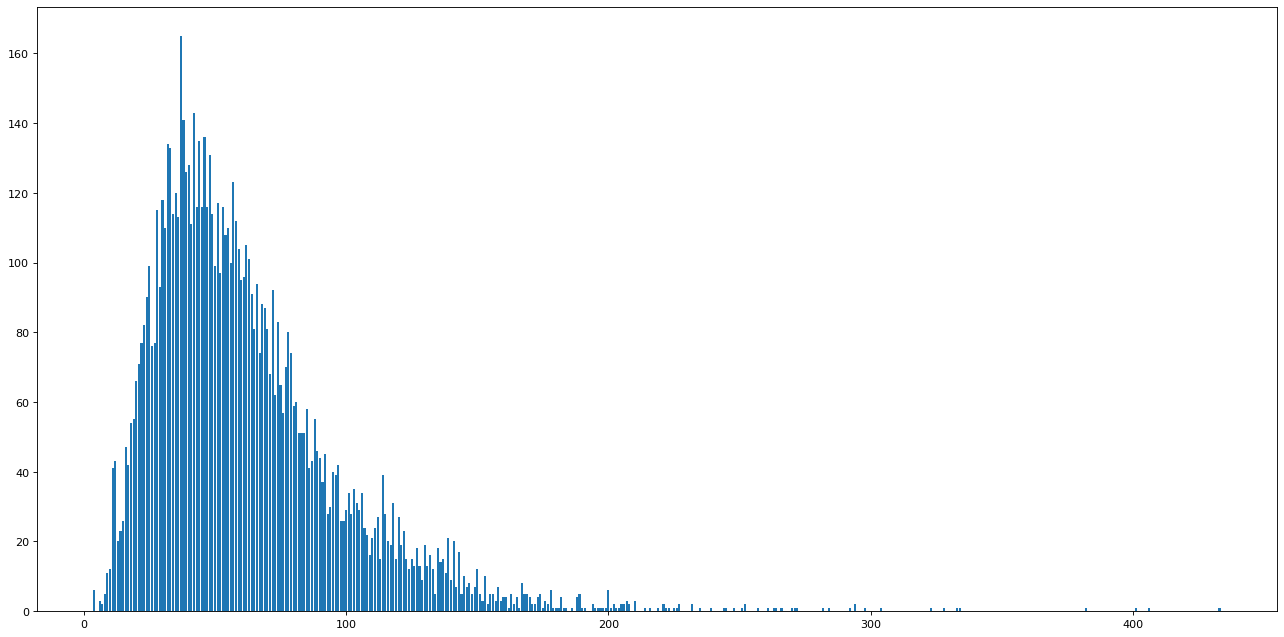

In [3]:
# word length distribution train set
from collections import Counter
import matplotlib.pyplot as plt

lengths = []
for text in df_train.text:
    lengths.append(len(text))
c = Counter(lengths)
plt.figure(figsize=(20, 10), dpi=80)
plt.bar([i for i in c.keys()], c.values())
plt.show()

In [4]:
# train valid split on initial training set
from sklearn.model_selection import train_test_split

y = df_train['label']
df_train, df_val = train_test_split(df_train, test_size=0.0029375, random_state=42, stratify=y)
del y

print('Valid:', df_val.shape[0])
print('Test:', df_train.shape[0])

Valid: 25
Test: 8475


In [5]:
# get test data
df_test = pd.read_json(test_path, lines=True)
df_test.head()

,id,img,text
0,16395,img/16395.png,handjobs sold seperately
1,37405,img/37405.png,introducing fidget spinner for women
2,94180,img/94180.png,happy pride month let's go beat up lesbians
3,54321,img/54321.png,laughs in [majority of u.s crime rate]
4,97015,img/97015.png,finds out those 72 virgins.. are goats


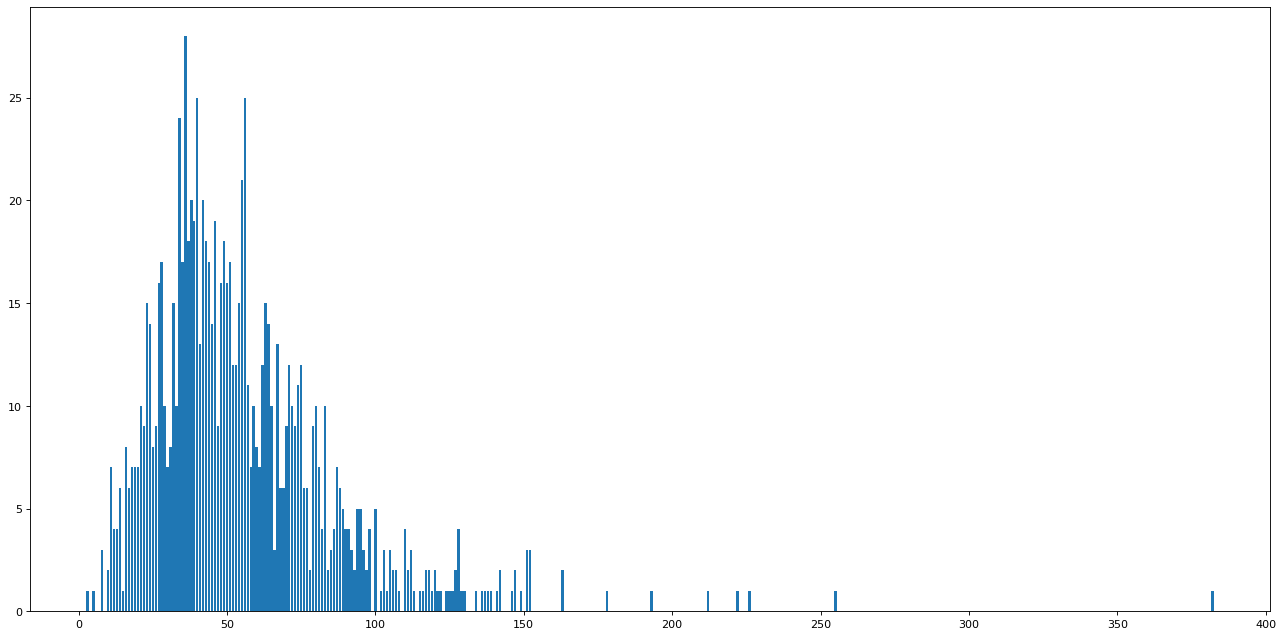

In [6]:
# word length distribution test set
lengths = []
for text in df_test.text:
    lengths.append(len(text))
c = Counter(lengths)
del lengths
plt.figure(figsize=(20, 10), dpi=80)
plt.bar([i for i in c.keys()], c.values())
plt.show()

In [7]:
# create tokenizer
!pip3 install -q transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

print(list(tokenizer.get_vocab().keys())[12321:12345])

['finishes', '##ib', 'jade', 'import', '##nse', '##hot', 'champagne', 'mice', 'securing', 'celebrities', 'helsinki', 'attributes', '##gos', 'cousins', 'phases', 'ache', 'lucia', 'gandhi', 'submission', 'vicar', 'spear', 'shine', 'tasmania', 'biting']


In [8]:
# test tokenizer
max_text_length = 512 # max for BERT

bert_input = tokenizer.encode_plus(
                        "Give me a run for my money. There is nobody, no one to outrun me. So give me a run for my money. Sipping bubbly, feeling lovely. Living lovely. Just love me.",                      
                        add_special_tokens = True, # add [CLS], [SEP]
                        max_length = max_text_length, # max length of the text that can go to BERT
                        pad_to_max_length = True, # add [PAD] tokens
                        return_attention_mask = True, # add attention mask to not focus on pad tokens
                        truncation = True # truncate values to max_text_length
              )

print('encoded', bert_input)

encoded {'input_ids': [101, 2507, 2033, 1037, 2448, 2005, 2026, 2769, 1012, 2045, 2003, 6343, 1010, 2053, 2028, 2000, 2041, 15532, 2033, 1012, 2061, 2507, 2033, 1037, 2448, 2005, 2026, 2769, 1012, 24747, 20934, 24200, 1010, 3110, 8403, 1012, 2542, 8403, 1012, 2074, 2293, 2033, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
# tokenize text
def create_text_inputs(df):

    input_ids = []
    token_type_ids = []
    attention_mask = []
    for text in df.text:

          bert_input = tokenizer.encode_plus(
                            text,                      
                            add_special_tokens = True, # add [CLS], [SEP]
                            max_length = max_text_length, # max length of the text that can go to BERT
                            pad_to_max_length = True, # add [PAD] tokens
                            return_attention_mask = True, # add attention mask to not focus on pad tokens
                            truncation = True # truncate values to max_text_length
                  )
          input_ids.append(bert_input["input_ids"])
          token_type_ids.append(bert_input["token_type_ids"])
          attention_mask.append(bert_input["attention_mask"])

    df["input_ids"] = input_ids
    df["token_type_ids"] = token_type_ids
    df["attention_mask"] = attention_mask
    df.drop("text", axis=1, inplace=True)

create_text_inputs(df_train)
create_text_inputs(df_val)

In [10]:
# store text data as numpy arrays
import numpy as np

input_ids = np.array(list(x for x in df_train.input_ids)).astype('int32')
token_type_ids = np.array(list(x for x in df_train.token_type_ids)).astype('int8')
attention_mask = np.array(list(x for x in df_train.attention_mask)).astype('int8')

input_ids_val = np.array(list(x for x in df_val.input_ids)).astype('int32')
token_type_ids_val = np.array(list(x for x in df_val.token_type_ids)).astype('int8')
attention_mask_val = np.array(list(x for x in df_val.attention_mask)).astype('int8')

In [11]:
# load image arrays
from tensorflow.keras.preprocessing import image

image_size = 299

def load_imgs(df):

    images = []
    for img_id in df.img:
        img = image.load_img(data_dir + '/' + img_id, target_size=(image_size, image_size))
        img = image.img_to_array(img)
        images.append(img)
    
    df.img = images

load_imgs(df_train)
load_imgs(df_val)

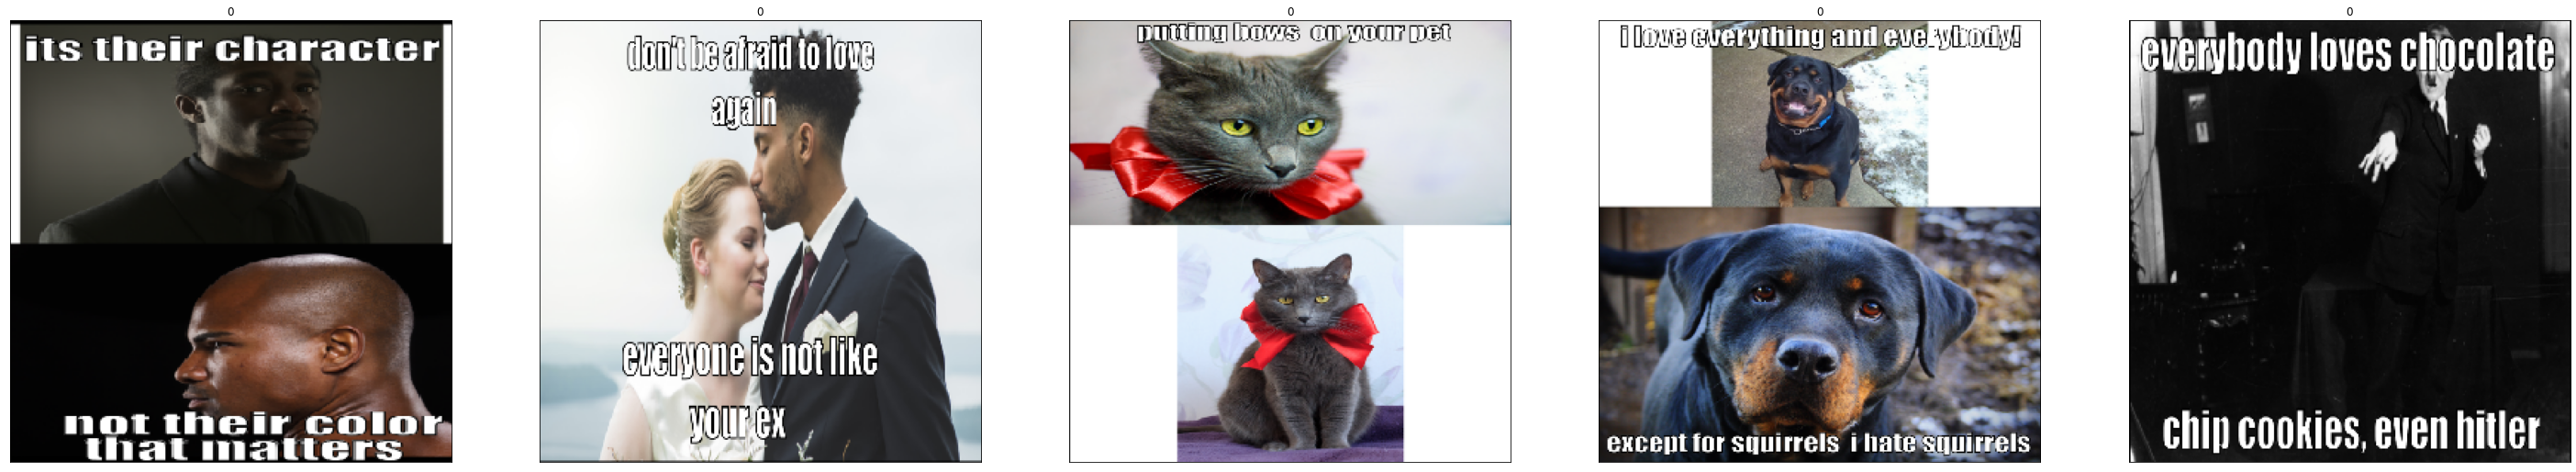

In [12]:
# display first 5 memes
fig = plt.figure(figsize=(50,50))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(df_train.img[i].astype("uint8")) 
    ax.set_title(str(df_train.label[i]))

In [13]:
# store labels as numpy arrays
train_labels = np.array(list(x for x in df_train.label)).astype('int8')
val_labels = np.array(list(x for x in df_val.label)).astype('int8')

imgs = df_train.img
imgs_val = df_val.img
del df_train, df_val

In [14]:
# load BERT model
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.keras import layers

input_word_ids = tf.keras.layers.Input(shape=(max_text_length,), dtype=tf.int32, name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_text_length,), dtype=tf.int32, name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_text_length,), dtype=tf.int32, name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

bert = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[pooled_output, sequence_output])
bert.summary()

INFO:absl:Using /tmp/tfhub_modules to cache modules.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 512)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [15]:
# load Inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3
inception = InceptionV3(include_top=False, weights='imagenet', pooling=None, input_shape=(image_size, image_size, 3))
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [16]:
# create final model using both Inception and BERT 
img_vector = layers.GlobalAveragePooling2D()(inception.output)
img_dense = layers.Dense(512)(img_vector)

bert_dense = layers.Dense(512, activation="relu")(bert.output[0])

concat = layers.concatenate([img_dense, bert_dense])

dense1 = layers.Dense(1028, activation="relu")(concat)
dense_dropout1 = layers.Dropout(0.125)(dense1)
dense2 = layers.Dense(512, activation="relu")(dense_dropout1)
dense_dropout2 = layers.Dropout(0.125)(dense2)
dense3 = layers.Dense(256, activation="relu")(dense_dropout2)
dense_dropout3 = layers.Dropout(0.125)(dense3)

preds = layers.Dense(1, activation='sigmoid', name="output")(dense_dropout2)

model = Model(inputs=[inception.input, bert.input], outputs=preds)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation_10 (Activation)      (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [17]:
# freeze all convolutional InceptionV3 layers
for layer in inception.layers:
    layer.trainable = False

import tensorflow.keras.backend as K

trainable_count = np.sum([K.count_params(w) for w in model.trainable_weights])
non_trainable_count = np.sum([K.count_params(w) for w in model.non_trainable_weights])

print('Total params: {:,}'.format(trainable_count + non_trainable_count))
print('Trainable params: {:,}'.format(trainable_count))
print('Non-trainable params: {:,}'.format(non_trainable_count))

Total params: 134,308,902.0
Trainable params: 3,023,877
Non-trainable params: 131,285,025.0


In [18]:
# name of inception input layer
img_input = model.layers[0].name

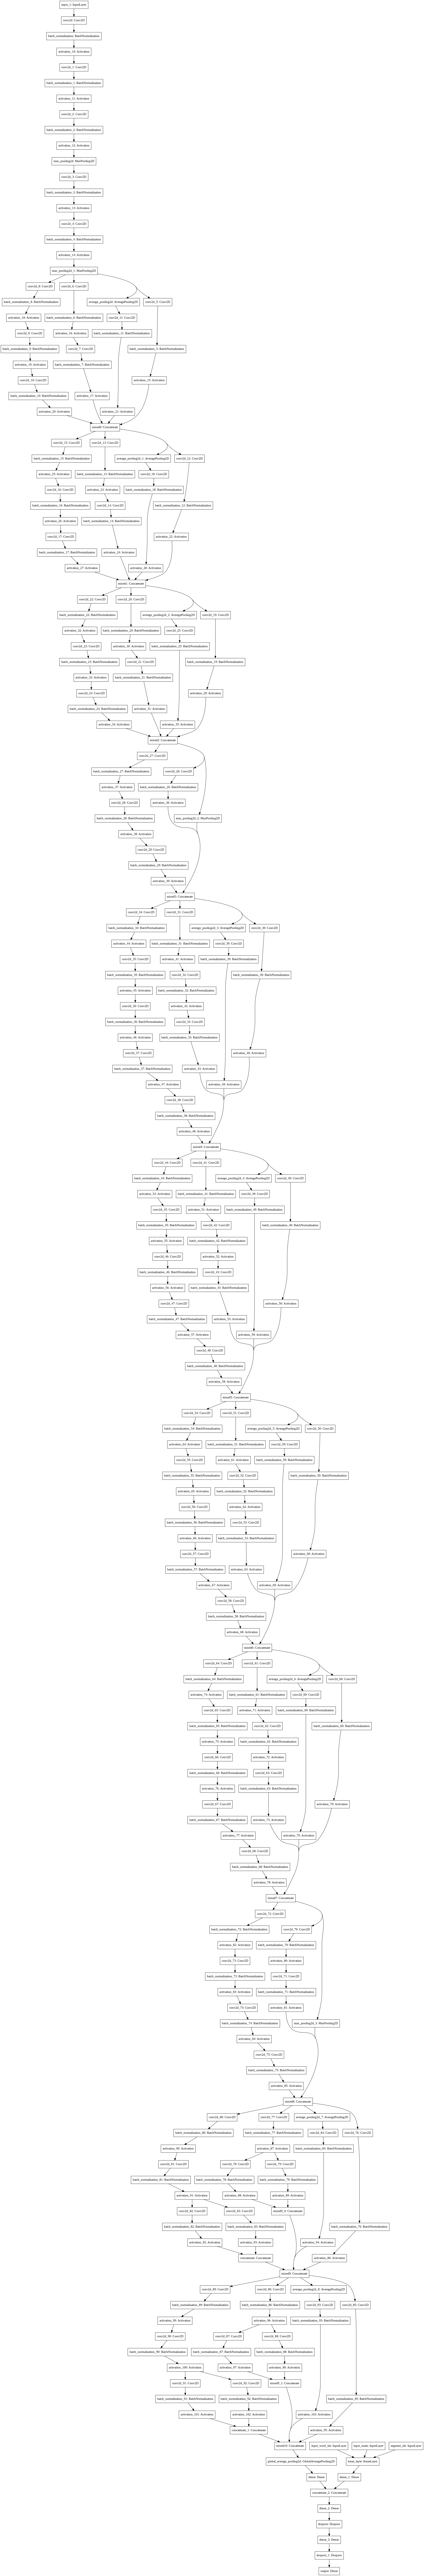

In [19]:
# visualize model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [20]:
# compile model
model.compile(optimizer = 'adam', 
              loss = {"output": 'binary_crossentropy'},
              metrics = {"output": "AUC"}) 

In [21]:
# checkpointer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

save_model_path = "final-best.hdf5"
checkpoint = ModelCheckpoint(save_model_path, 
                             monitor='val_loss', 
                             verbose=1,        
                             save_best_only=True)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2, 1.2], 
                             rotation_range=180, 
                             width_shift_range=0.125, 
                             height_shift_range=0.125, 
                             zoom_range=[0.925, 1.25], 
                             vertical_flip=True, 
                             horizontal_flip=True, 
                             fill_mode="nearest", 
                             preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

datagen_val_test = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

In [ ]:
batch_siz = 75

val_images = []
for img in imgs_val:
    processed = datagen_val_test.flow(expand_dims(img, 0), batch_size=1)
    val_images.append(processed.next())
val_images = np.array(val_images, dtype="float16").reshape(len(val_images), image_size, image_size, 3)
del imgs_val

for epoch in range(25):

    print("\nStarting Epoch", epoch+1)
    start = 0
    stop = batch_siz

    while stop < len(imgs):

        train_images = []
        for img in imgs[start:stop]:
            processed = datagen.flow(expand_dims(img, 0), batch_size=1)
            train_images.append(processed.next())
        train_images = np.array(train_images, dtype="float16").reshape(batch_siz, image_size, image_size, 3)
        del processed

        # fit final model
        model.fit({img_input: train_images, 
                  'input_word_ids': input_ids[start:stop], 
                  "input_mask": token_type_ids[start:stop], 
                  "segment_ids": attention_mask[start:stop]},
                  {"output": train_labels[start:stop]},
                  validation_data=({img_input: val_images, 
                  'input_word_ids': input_ids_val, 
                  "input_mask": token_type_ids_val, 
                  "segment_ids": attention_mask_val},
                  {"output": val_labels}),
                  callbacks=[checkpoint],
                  shuffle=True, 
                  batch_size=8, 
                  epochs=1)
        
        del train_images
        
        start += batch_siz
        stop += batch_siz

In [ ]:
# load best model
model.load_weights(save_model_path)

In [ ]:
# create text input from test data
create_text_inputs(df_test)
input_ids_test = np.array(list(x for x in df_test.input_ids)).astype('int32')
token_type_ids_test = np.array(list(x for x in df_test.token_type_ids)).astype('int8')
attention_mask_test = np.array(list(x for x in df_test.attention_mask)).astype('int8')

In [ ]:
# create image input from test data
load_imgs(df_test)
test_images = []
for img in df_test.img:
    processed = datagen_val_test.flow(expand_dims(img, 0), batch_size=1)
    test_images.append(processed.next())
test_images = np.array(test_images, dtype="float16").reshape(len(test_images), image_size, image_size, 3)

In [ ]:
# make predictions on test set
preds = model.predict({img_input: test_images, 
              'input_word_ids': input_ids_test, 
              "input_mask": token_type_ids_test, 
              "segment_ids": attention_mask_test})

In [ ]:
# create list of probabilities and binary class labels 
pred_probas = [pred[0] for pred in preds]
pred_binary = [pred.argmax() for pred in preds]
del preds

In [ ]:
# create submission dataframe
submission = pd.DataFrame({"id": df_test.id, 
                          "proba": pred_probas, 
                          "label": pred_binary})
del df_test
submission.head()

,id,proba,label
0,16395,0.203777,0
1,37405,0.430428,0
2,94180,0.302097,0
3,54321,0.256762,0
4,97015,0.215882,0


In [ ]:
submission.label.value_counts()

In [ ]:
# download submission as csv file
submission.to_csv("hateful_memes_submission.csv", index=False)
from google.colab import files
files.download("hateful_memes_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>